# First Demo

## Showing the leumi data and analyzing it 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize
import yfinance as yf

In [2]:
leumi_data = yf.Ticker("LUMI.TA")
leumi_data = leumi_data.history(start='2005-01-01',end='2023-05-15')
leumi_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-12-31 00:00:00+02:00,1319.711009,1326.772063,1307.001111,1320.417114,2175846,0.0,0.0
2008-01-01 00:00:00+02:00,1316.886568,1336.657520,1313.356041,1327.478149,2695461,0.0,0.0
2008-01-02 00:00:00+02:00,1326.065922,1362.783402,1315.474341,1343.012451,4339540,0.0,0.0
2008-01-03 00:00:00+02:00,1334.539203,1351.485733,1314.768252,1327.478149,3862576,0.0,0.0
2008-01-06 00:00:00+02:00,1292.172726,1313.355886,1282.287252,1312.649780,4644695,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-08 00:00:00+03:00,2821.075058,2824.983717,2764.399494,2774.171143,3316512,0.0,0.0
2023-05-09 00:00:00+03:00,2752.673274,2765.376417,2727.266989,2759.513428,2275721,0.0,0.0
2023-05-10 00:00:00+03:00,2781.011016,2824.006267,2765.376379,2814.234619,3275942,0.0,0.0


<Axes: xlabel='Date'>

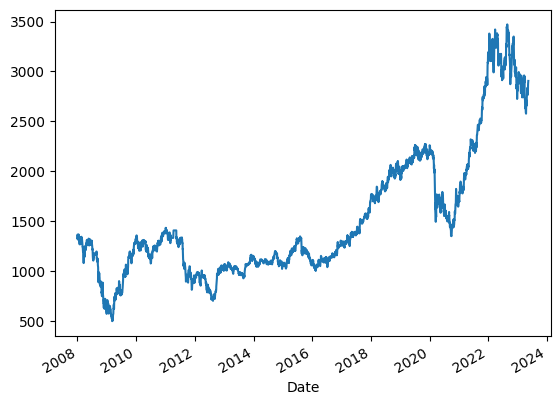

In [3]:
leumi_data["High"].plot()

## Grabbing the data 

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize

In [5]:
import yfinance as yf
leumi = yf.Ticker("LUMI.TA")

In [6]:
def change_alignment(ticker_series , a ,b):
    ticker_indexes = pd.Series(range(ticker_series.shape[0]))
    X = ticker_indexes.values.reshape(-1, 1)  # values converts it into a numpy array
    Y = ticker_series.values.reshape(-1, 1)
    Y_normalized = Y - (X * a + b)
    #plt.plot(X, Y_normalized, color="red")
    df = pd.DataFrame(Y_normalized , index=ticker_series.index)
    return df 

In [7]:
def align_on_x_axis(ticker_series):
    """Creating from a ticker an align DataFrame"""
    ticker_indexes = pd.Series(range(ticker_series.shape[0]))
    X = ticker_indexes.values.reshape(-1, 1)  # values converts it into a numpy array
    Y = ticker_series.values.reshape(-1, 1)
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    b = linear_regressor.intercept_
    a = linear_regressor.coef_ # if for example a=5 than we gain 5 agorot per day ( or the inserted data)

    Y_normalized = Y - (X * a.item() + b.item())
    #plt.plot(X, Y_normalized, color="red")
    df = pd.DataFrame(Y_normalized , index=ticker_series.index)
    return df ,a ,b

<Axes: xlabel='Date'>

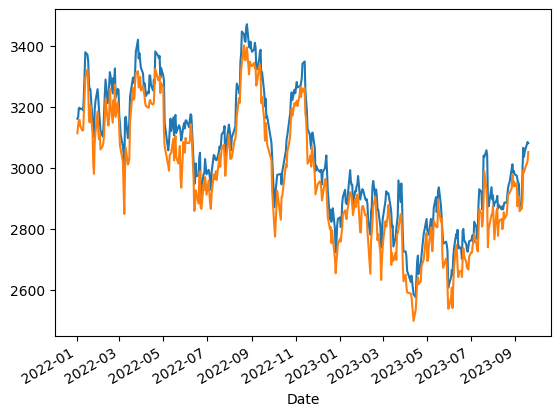

In [8]:
ticker_between_dates = leumi.history(start='2022-01-01',end='2023-09-20')
ticker_between_dates['High'].plot()
ticker_between_dates['Low'].plot()

                                    0
Date                                 
2022-01-02 00:00:00+02:00 -124.432183
2022-01-03 00:00:00+02:00 -119.496622
2022-01-04 00:00:00+02:00  -87.559142
2022-01-05 00:00:00+02:00  -84.485698
2022-01-06 00:00:00+02:00  -87.930600
...                               ...
2023-09-12 00:00:00+03:00  285.372279
2023-09-13 00:00:00+03:00  256.583197
2023-09-14 00:00:00+03:00  274.794115
2023-09-18 00:00:00+03:00  308.005033
2023-09-19 00:00:00+03:00  305.215951

[422 rows x 1 columns]


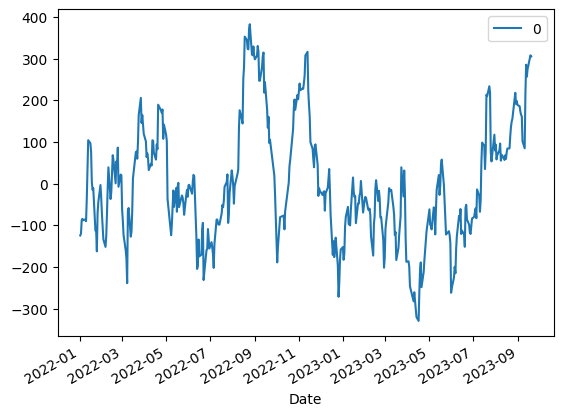

In [9]:

df  ,a ,b= align_on_x_axis(ticker_between_dates['High'])
df.plot()
print(df)

In [39]:
df


,High,numbers,Dates
Date,,,
2009-01-07,377.466377,0,2009-01-07
2009-01-08,374.262600,1,2009-01-08
2009-01-11,371.755419,2,2009-01-11
2009-01-12,369.339331,3,2009-01-12
2009-01-13,366.760234,4,2009-01-13
...,...,...,...
2023-09-13,1924.271429,3624,2023-09-13
2023-09-14,1925.585714,3625,2023-09-14
2023-09-18,1926.457143,3626,2023-09-18


# Smoothing Function 


## The Easy Solution (In my opinion the best) 

In [10]:
def smoothing_convolve(ticker_series):
    series = ticker_series.rolling(70).mean()
    return series

Date
2022-01-02 00:00:00+02:00    3161.148413
2022-01-03 00:00:00+02:00    3164.873057
2022-01-04 00:00:00+02:00    3195.599618
2022-01-05 00:00:00+02:00    3197.462144
2022-01-06 00:00:00+02:00    3192.806324
                                ...     
2023-09-12 00:00:00+03:00    3066.000000
2023-09-13 00:00:00+03:00    3036.000000
2023-09-14 00:00:00+03:00    3053.000000
2023-09-18 00:00:00+03:00    3085.000000
2023-09-19 00:00:00+03:00    3081.000000
Name: High, Length: 422, dtype: float64
Date
2022-01-02 00:00:00+02:00            NaN
2022-01-03 00:00:00+02:00            NaN
2022-01-04 00:00:00+02:00            NaN
2022-01-05 00:00:00+02:00            NaN
2022-01-06 00:00:00+02:00            NaN
                                ...     
2023-09-12 00:00:00+03:00    2866.841206
2023-09-13 00:00:00+03:00    2872.368436
2023-09-14 00:00:00+03:00    2877.316994
2023-09-18 00:00:00+03:00    2882.300888
2023-09-19 00:00:00+03:00    2886.552744
Name: High, Length: 422, dtype: float64


<Axes: xlabel='Date'>

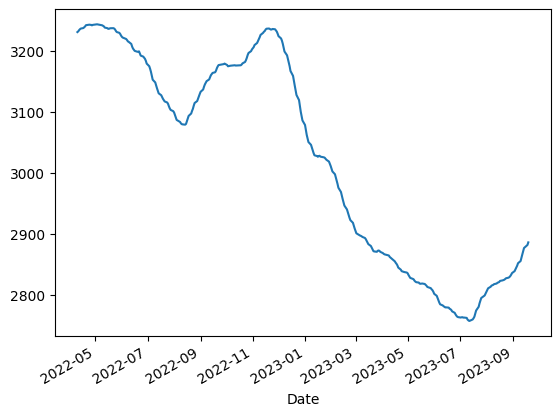

In [11]:
print(ticker_between_dates['High'])
df = smoothing_convolve(ticker_between_dates['High'])
print(df)
df.plot()

## Harder Solution 

## This Solution uses fourier analysis (it's a bit slower but the function looks smoother 

In [12]:
import scipy.fft
import numpy as np
def smoothing_fourier(ticker_series):  
    Y_normalized = ticker_series.values.reshape(-1)
    fft_Y_norm = np.fft.fft(Y_normalized)
    #print(fft_Y_norm)
    freq = fft_Y_norm.shape[0]//2 - 20
    fft_Y_norm[fft_Y_norm.shape[0]//2-freq:fft_Y_norm.shape[0]//2+freq] = 0 + 0.j
    fft_Y_norm = np.fft.ifft(fft_Y_norm)
    #plt.plot(fft_Y_norm)
    df = pd.DataFrame(fft_Y_norm , index=ticker_series.index)
    return df
    #plt.plot(scipy.fft.ifft(fft_Y_norm))

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


,0
Date,
2022-01-02 00:00:00+02:00,3335.531915-9.723020j
2022-01-03 00:00:00+02:00,3319.315002-8.735075j
2022-01-04 00:00:00+02:00,3305.866751-6.978264j
2022-01-05 00:00:00+02:00,3295.208601-4.607225j
2022-01-06 00:00:00+02:00,3287.151374-1.830655j
...,...
2023-09-12 00:00:00+03:00,2932.178065-2.697703j
2023-09-13 00:00:00+03:00,2909.375929-5.376340j
2023-09-14 00:00:00+03:00,2886.396184-7.581749j


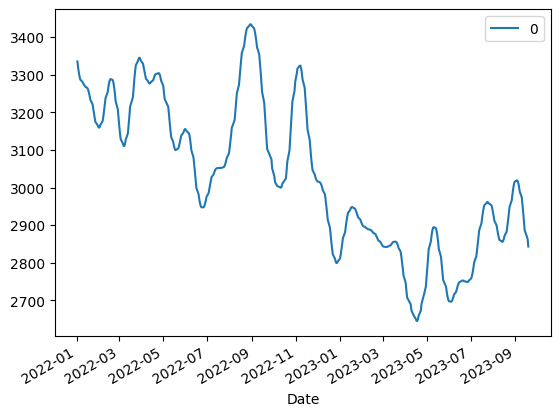

In [13]:
Y_normalized ,a ,b = align_on_x_axis(ticker_between_dates['High']) # Hard Calculation !
df = smoothing_fourier(Y_normalized)
df = change_alignment(df , -a , -b)
df.plot()
df

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: xlabel='Date'>

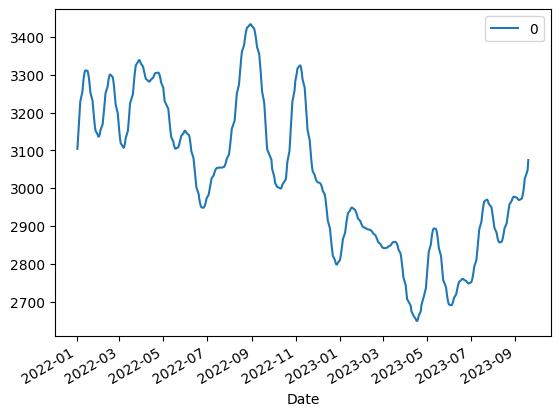

In [14]:
df = smoothing_fourier(ticker_between_dates['High'])
df.plot()

## So Fourier here is not great ??? 

# Finding the last big Change 

# Crucial algorithm which finds the last big change and regress according to it 

In [15]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
def finding_last_big_change(ticker_series):
    #leumi_regression_data.reset_index(inplace=False)
    indexing = pd.RangeIndex(start=0,stop=len(ticker_series) ,step=1)
    ticker_series["numbers"] = indexing
    leumi_regression_data_reversed = ticker_series.iloc[-30::-1] # drops the last 30 dates for regression 
    count = 0
    for date in leumi_regression_data_reversed.index: #remove [:1] after tests 
        count+=1
        linear_regressor = LinearRegression()  # create object for the class
        current_date = "{}-{}-{}".format(date.year,date.month,date.day)
        current_regression = ticker_series.loc[current_date:] 
        linear_regressor.fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        reg = LinearRegression().fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        #r2_score_data = reg.score(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        #r2_score_data = mean_squared_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
        r2_score_data = mean_absolute_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
        if (r2_score_data > 750):
            temp = pd.Series(reg.predict(ticker_series["numbers"].values.reshape(-1,1)).reshape(-1))
            ticker_series["Dates"] = ticker_series.index
            data = ticker_series.set_index("numbers")
            data["pred y"]= temp
            data = data.set_index("Dates")
            data.plot()
            b = linear_regressor.intercept_
            a = linear_regressor.coef_ 
            print("number of iterations is:" ,count)
            return date , a.item(),b.item()
        #print(f"R-squared value: {r2_score}")
    print("number of iterations is:" ,count)

number of iterations is: 1


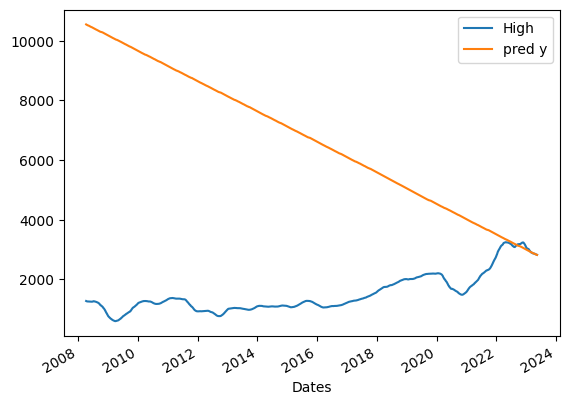

In [16]:
leumi_regression_data = leumi.history(start='2005-01-01',end='2023-05-15')

leumi_regression_data = leumi_regression_data["High"]
#leumi_regression_data = smoothing_convolve(leumi_regression_data)
leumi_regression_data = leumi_regression_data.rolling(70).mean()
leumi_regression_data = leumi_regression_data.dropna() #drops the NaN elements 
#leumi_regression_data
df = pd.DataFrame(leumi_regression_data)
#df.reset_index(inplace=False)

#df["High"] = leumi_regression_data 
#print(df)
date , a , b = finding_last_big_change(df)

,High
Date,
2008-04-06 00:00:00+03:00,-9270.293980
2008-04-07 00:00:00+03:00,-9269.813904
2008-04-08 00:00:00+03:00,-9269.283364
2008-04-09 00:00:00+03:00,-9268.795926
2008-04-10 00:00:00+03:00,-9268.242936
...,...
2023-05-08 00:00:00+03:00,0.140657
2023-05-09 00:00:00+03:00,-0.056357
2023-05-10 00:00:00+03:00,0.611691


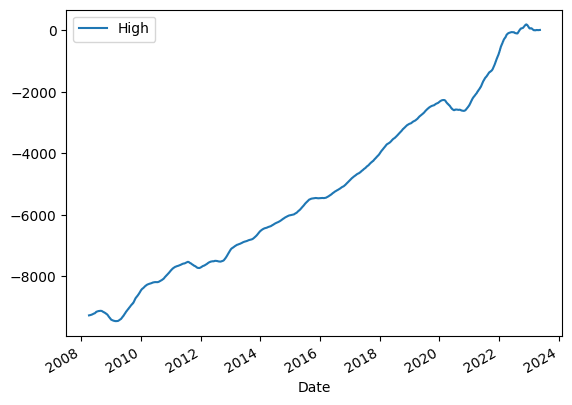

In [17]:
df1 = change_alignment(df["High"] , a , b)
df1.rename(columns={0: 'High'}, inplace=True)

df1.plot()
df1

,High
Date,
2023-03-26 00:00:00+03:00,-6.733833
2023-03-27 00:00:00+03:00,-2.972970
2023-03-28 00:00:00+03:00,-0.433538
2023-03-29 00:00:00+03:00,1.078146
2023-03-30 00:00:00+03:00,1.518774
2023-04-02 00:00:00+03:00,1.574468
2023-04-03 00:00:00+03:00,2.396839
2023-04-04 00:00:00+03:00,3.621230
2023-04-09 00:00:00+03:00,3.847750


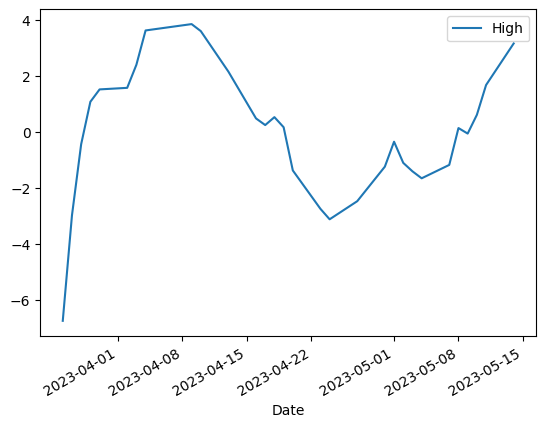

In [18]:
current_date = "{}-{}-{}".format(date.year,date.month,date.day)
df1.loc[current_date:].plot()
df1.loc[current_date:]

,High
Date,
2023-03-26 00:00:00+03:00,153.281423
2023-03-27 00:00:00+03:00,216.535563
2023-03-28 00:00:00+03:00,164.867469
2023-03-29 00:00:00+03:00,55.546229
2023-03-30 00:00:00+03:00,-0.030445
2023-04-02 00:00:00+03:00,2.045087
2023-04-03 00:00:00+03:00,-10.536347
2023-04-04 00:00:00+03:00,-56.341965
2023-04-09 00:00:00+03:00,-91.398434


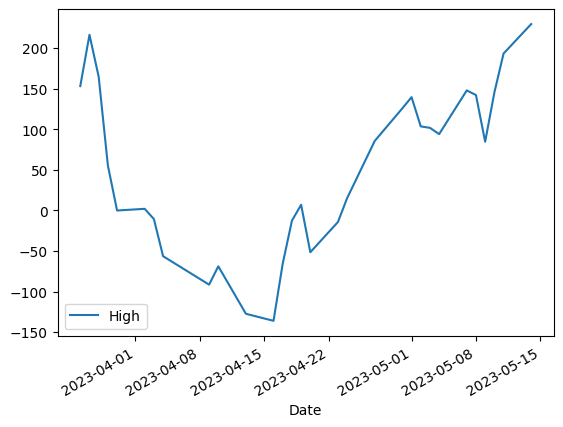

In [19]:
leumi_data_normed = leumi.history(start='2005-01-01',end='2023-05-15')
leumi_data_normed = leumi_data_normed["High"]
df2 = change_alignment(leumi_data_normed , a , b)
df2.rename(columns={0: 'High'}, inplace=True)
current_date = "{}-{}-{}".format(date.year,date.month,date.day)
df2.loc[current_date:].plot()
df2.loc[current_date:]


# Generalized the solution 

## Getting all the TLV 35 

In [20]:
import yfinance as yf

# Download 15 years of historical stocks using the daily time frame
leumi = yf.download("LUMI.TA", period="15y", interval="1d")
discount = yf.download("DSCT.TA", period="15y", interval="1d")
bezeq = yf.download("BEZQ.TA", period="15y", interval="1d")
cellcom = yf.download("CEL.TA", period="15y", interval="1d")
elbit = yf.download("ESLT.TA", period="15y", interval="1d")
nice = yf.download("NICE.TA", period="15y", interval="1d")
teva = yf.download("TEVA.TA", period="15y", interval="1d")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

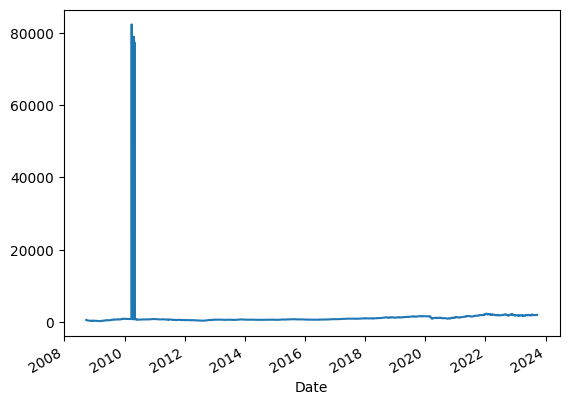

In [21]:
discount["High"].plot()

In [22]:
leumi = yf.download("LUMI.TA", period="15y", interval="1d")

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

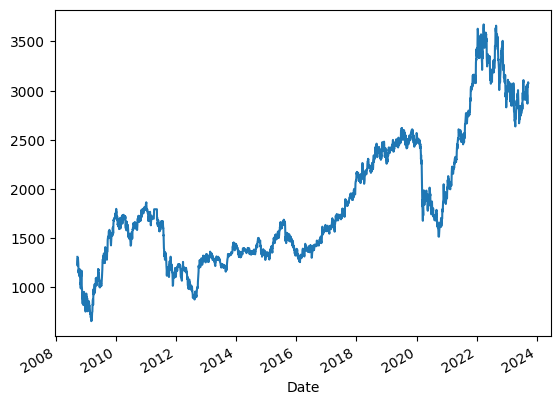

In [23]:
leumi["High"].plot()

Date
2008-09-21     563.819580
2008-09-22     528.580811
2008-09-23     520.526306
2008-09-24     533.614929
2008-09-25     528.580811
                 ...     
2023-09-13    1968.000000
2023-09-14    1976.000000
2023-09-18    1981.000000
2023-09-19    1987.000000
2023-09-20    1985.000000
Name: High, Length: 3698, dtype: float64
number of iterations is: 1


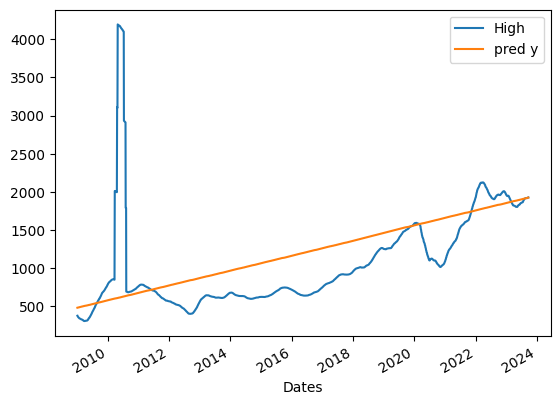

In [24]:
#leumi_regression_data = leumi.history(start='2005-01-01',end='2023-05-15')

discount_regression_data = discount["High"]
print(discount_regression_data)
#discount_regression_data = smoothing_convolve(leumi_regression_data)
discount_regression_data = discount_regression_data.rolling(70).mean()
discount_regression_data = discount_regression_data.dropna() #drops the NaN elements 
df = pd.DataFrame(discount_regression_data)
date , a , b = finding_last_big_change(df)

## And in most generalized way we have 

In [25]:
def analyse_last_big_change_auto(ticker,field):
    ticker_regression_data = ticker[field]
    print(ticker_regression_data)
    #ticker_regression_data = smoothing_convolve(leumi_regression_data)
    ticker_regression_data = ticker_regression_data.rolling(70).mean()
    ticker_regression_data = ticker_regression_data.dropna() #drops the NaN elements 
    df = pd.DataFrame(ticker_regression_data)
    date , a , b = finding_last_big_change(df)

Date
2008-09-21     563.819580
2008-09-22     528.580811
2008-09-23     520.526306
2008-09-24     533.614929
2008-09-25     528.580811
                 ...     
2023-09-13    1968.000000
2023-09-14    1976.000000
2023-09-18    1981.000000
2023-09-19    1987.000000
2023-09-20    1985.000000
Name: High, Length: 3698, dtype: float64
number of iterations is: 1


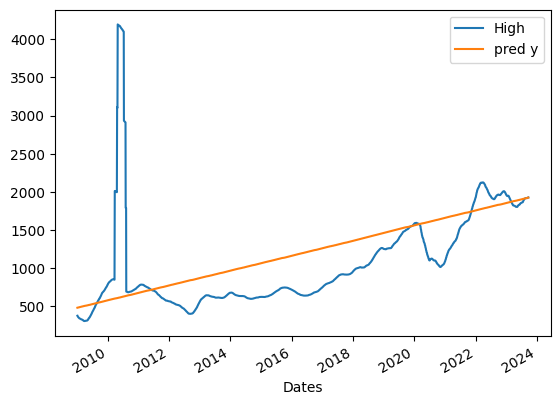

In [26]:
analyse_last_big_change_auto(discount , "High")

Date
2008-09-21    10340.0
2008-09-22    10010.0
2008-09-23     9695.0
2008-09-24     9850.0
2008-09-25     9947.0
               ...   
2023-09-13    70160.0
2023-09-14    67840.0
2023-09-18    69080.0
2023-09-19    68570.0
2023-09-20    68190.0
Name: High, Length: 3699, dtype: float64
number of iterations is: 1


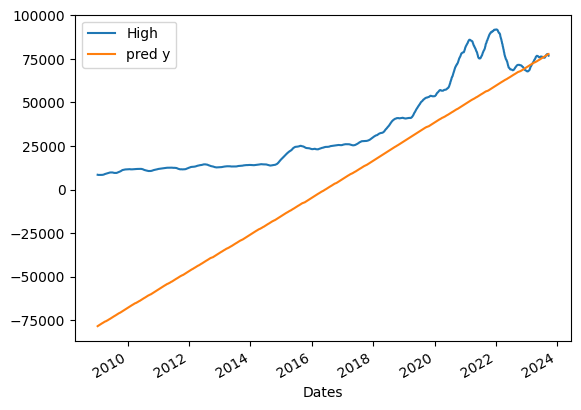

In [27]:
analyse_last_big_change_auto(nice , "High")

Date
2008-09-21    18100.0
2008-09-22    18150.0
2008-09-23    17800.0
2008-09-24    18120.0
2008-09-25    18530.0
               ...   
2023-09-13    76490.0
2023-09-14    76690.0
2023-09-18    76240.0
2023-09-19    77360.0
2023-09-20    76970.0
Name: High, Length: 3698, dtype: float64
number of iterations is: 1


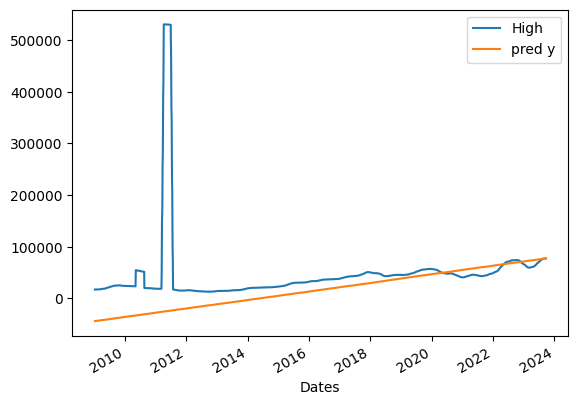

In [28]:
analyse_last_big_change_auto(elbit , "High")

Date
2008-09-21    10470.0
2008-09-22    10340.0
2008-09-23    10100.0
2008-09-24    10170.0
2008-09-25    10250.0
               ...   
2023-09-13     1230.0
2023-09-14     1195.0
2023-09-18     1170.0
2023-09-19     1173.0
2023-09-20     1215.0
Name: High, Length: 3699, dtype: float64
number of iterations is: 1


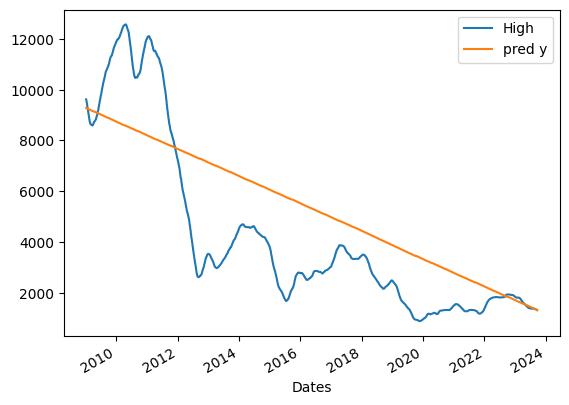

In [29]:
analyse_last_big_change_auto(cellcom , "High")

Date
2008-09-21    659.099976
2008-09-22    648.299988
2008-09-23    639.000000
2008-09-24    650.000000
2008-09-25    634.900024
                 ...    
2023-09-13    527.299988
2023-09-14    524.900024
2023-09-18    517.000000
2023-09-19    539.000000
2023-09-20    546.000000
Name: High, Length: 3698, dtype: float64
number of iterations is: 1


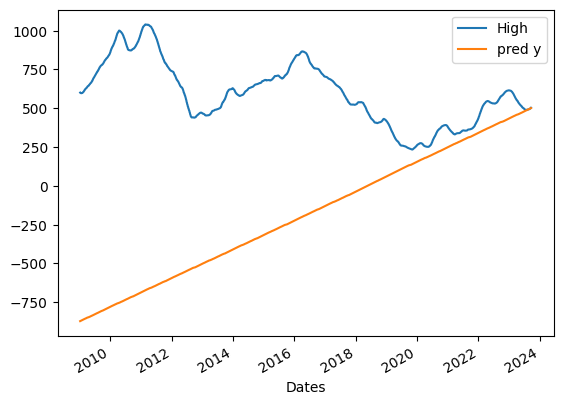

In [30]:
analyse_last_big_change_auto(bezeq , "High")

Date
2008-09-21    16150.0
2008-09-22    16160.0
2008-09-23    15200.0
2008-09-24    15430.0
2008-09-25    15800.0
               ...   
2023-09-13     3912.0
2023-09-14     4030.0
2023-09-18     4073.0
2023-09-19     4060.0
2023-09-20     4028.0
Name: High, Length: 3697, dtype: float64
number of iterations is: 1105


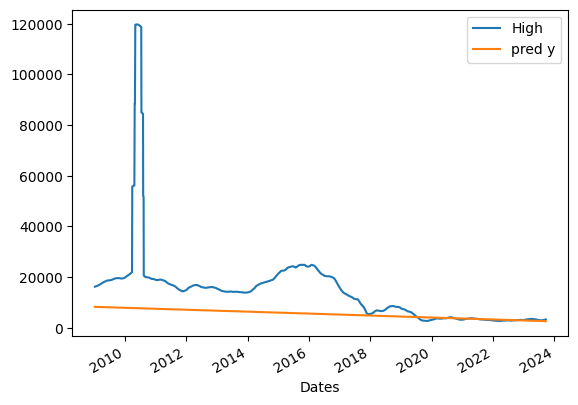

In [31]:
analyse_last_big_change_auto(teva , "High")

# Another Evaluation Technique 

## Here are all TLV 35 Stocks , I'll Search for negative correlation between any of them 

In [32]:
tickers = [leumi ,discount , bezeq,cellcom ,elbit,nice ,teva]

In [33]:
res = [(a, b) for idx, a in enumerate(tickers) for b in tickers[idx + 1:]]
for pair in res:
   print(pair[0]["High"].corr(pair[1]["High"]))

0.20113322617451157
-0.4064328526832921
-0.45995425118334515
0.09359479460985848
0.8237331489937902
-0.09512502863600415
-0.05099247685129479
-0.04753885847540248
0.011356512206235075
0.16569635262857915
0.9510246371467588
0.7547298418117879
0.09437384809406943
-0.6104955182734836
0.13885788885091221
0.0754480858053249
-0.6482910226310582
0.12968954926863877
0.041462859132867735
-0.009531531149593897
-0.11921105824596656


In [34]:
# Download 15 years of historical stocks using the daily time frame
import yfinance as yf
tickers_names = ["LUMI.TA","DSCT.TA","BEZQ.TA","CEL.TA","ESLT.TA","NICE.TA","TEVA.TA"]
tickers_data = [yf.Ticker(ticker) for ticker in tickers_names]
tickers_pairs = [(a, b) for idx, a in enumerate(tickers_data) for b in tickers_data[idx + 1:]]
ticker_pairs_names = [ (pair[0].info["shortName"] ,pair[1].info["shortName"] ) for pair in tickers_pairs]
ticker_pairs_names

[('BK LEUMI LE ISRAEL', 'ISRAEL DISCOUNT BK'),
 ('BK LEUMI LE ISRAEL', 'BEZEQ ISRAEL TELCM'),
 ('BK LEUMI LE ISRAEL', 'CELLCOM ISRAEL LTD'),
 ('BK LEUMI LE ISRAEL', 'ELBIT SYSTEMS LTD'),
 ('BK LEUMI LE ISRAEL', 'NICE LTD'),
 ('BK LEUMI LE ISRAEL', 'TEVA PHARMA IND'),
 ('ISRAEL DISCOUNT BK', 'BEZEQ ISRAEL TELCM'),
 ('ISRAEL DISCOUNT BK', 'CELLCOM ISRAEL LTD'),
 ('ISRAEL DISCOUNT BK', 'ELBIT SYSTEMS LTD'),
 ('ISRAEL DISCOUNT BK', 'NICE LTD'),
 ('ISRAEL DISCOUNT BK', 'TEVA PHARMA IND'),
 ('BEZEQ ISRAEL TELCM', 'CELLCOM ISRAEL LTD'),
 ('BEZEQ ISRAEL TELCM', 'ELBIT SYSTEMS LTD'),
 ('BEZEQ ISRAEL TELCM', 'NICE LTD'),
 ('BEZEQ ISRAEL TELCM', 'TEVA PHARMA IND'),
 ('CELLCOM ISRAEL LTD', 'ELBIT SYSTEMS LTD'),
 ('CELLCOM ISRAEL LTD', 'NICE LTD'),
 ('CELLCOM ISRAEL LTD', 'TEVA PHARMA IND'),
 ('ELBIT SYSTEMS LTD', 'NICE LTD'),
 ('ELBIT SYSTEMS LTD', 'TEVA PHARMA IND'),
 ('NICE LTD', 'TEVA PHARMA IND')]

In [35]:
history_ticker_data = [ticker.history(start='2015-01-01',end='2023-05-15')["High"] for ticker in tickers_data]

In [36]:
res = [(a, b) for idx, a in enumerate(history_ticker_data) for b in history_ticker_data[idx + 1:]]

arr = []
for pair in res:
    arr.append(pair[0].corr(pair[1]))
print("Here is the array of correlation , please note that there are another possiblies")
print(arr)
np_arr = np.array(arr)
print("")
print("Here is the lowest correlation between the stocks ")
print(np_arr.min())
print("")
print("Here is the index of the pair of stocks that has minimum correlation")
print(np.argmin(np_arr))
tickers_data[1].history(start='2015-01-01',end='2023-05-15')["High"].corr(tickers_data[6].history(start='2015-01-01',end='2023-05-15')["High"])

Here is the array of correlation , please note that there are another possiblies
[0.9822303776320416, -0.06533863299060381, -0.4963696821571621, 0.8738257977091424, 0.7428681461070561, -0.7330139316193554, -0.13704666694548087, -0.5737969865705902, 0.8515273773969474, 0.8153713822375008, -0.7683680231122846, 0.6045909992073811, -0.024598854213044467, -0.29346315365499565, 0.44885235712583893, -0.3498850876675543, -0.7119969082378598, 0.49283402211335053, 0.5957091353628773, -0.7655797942727499, -0.7677692158896439]

Here is the lowest correlation between the stocks 
-0.7683680231122846

Here is the index of the pair of stocks that has minimum correlation
10


-0.7683680231122846

In [37]:
discount["High"].corr(teva["High"])

0.9510246371467588

In [38]:
import yfinance as yf

ticker = "LUMI.TA"
stock_name = yf.Ticker(ticker).info["longName"]

print(stock_name)
moshea = yf.Ticker(ticker)

Bank Leumi le-Israel B.M.
